## Gradient descent

##### by Piyush Sanghi

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing, linear_model, metrics

### Reading the data

In [40]:
df = pd.read_csv('C:/Users/Piyush/Dropbox/MScA/machine_learning/assignment_1/bottle.csv')

C:\Users\Piyush\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
df.shape

(864863, 74)

In [42]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Part A : Data Cleaning

###### 1) We will increase the complexity of our model slightly by increasing the number of features. Keep the following features:
- T_degC
- Salnty
- STheta
- O2ml_L
- Depthm

In [43]:
df = df.loc[:, ['T_degC', 'Salnty', 'STheta', 'O2ml_L', 'Depthm']]

In [44]:
df.head()

,T_degC,Salnty,STheta,O2ml_L,Depthm
0,10.50,33.440,25.649,NaN,0
1,10.46,33.440,25.656,NaN,8
2,10.46,33.437,25.654,NaN,10
3,10.45,33.420,25.643,NaN,19
4,10.45,33.421,25.643,NaN,20


###### 2) Remove NaN / NA values from dataset (prior to building train/test sets) (same as HW #1):
- Shape of your data should be: (661268, 5)

In [45]:
df.dropna(inplace=True)

In [46]:
df.shape

(661268, 5)

###### 3) Remove any STheta outliers (same as HW #1). 
- Shape of your data should be: (661268, 5)
- Note: Outliers for STheta might have been removed due to NAs in new features. Be sure to verify this on your own

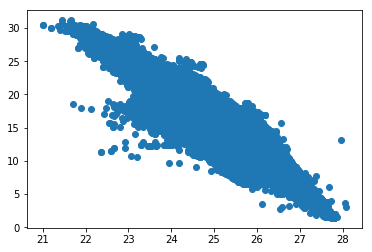

In [47]:
plt.scatter(df.STheta, df.T_degC)

Yes, outliers of STheta were removed when we dropped observations with NA

### Part B: Train / Test Split & Scaling

###### 1) Create X & y objects:

- X object should be all 4 predictors. Shape should be: (661268, 4)

- y object should be just your target variable (T_degC): Shape should be: (661268, 1)

Hint for y: You will need to specify the shape you want. Trying converting y to a numpy array, and then using the .reshape() method.

In [48]:
X = df[['Salnty', 'STheta', 'O2ml_L', 'Depthm']]
y = df[['T_degC']] #I am slicing the dataframe instead of converting to numpy and reshaping as end result is same.

In [49]:
print((X.shape, y.shape))

((661268, 4), (661268, 1))


###### 2) Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.

In [50]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=10)

In [51]:
print((X_train.shape, X_test.shape, y_train.shape, y_test.shape))

((529014, 4), (132254, 4), (529014, 1), (132254, 1))


###### 3) Scale all features to improve convergence in Gradient Descent. It is highly encouraged that you review the appropriate method of handling scaling with train & test data.

In [52]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [53]:
X_train_scaled = scaler.transform(X_train)

In [54]:
X_test_scaled = scaler.transform(X_test)

#### Part C: Linear Regression with sklearn

###### 1) Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train.

In [55]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###### 2) Print out the coefficients (including the intercept)

In [56]:
print("Coefficients: {0}\nIntercept: {1}".format(lin_reg.coef_, lin_reg.intercept_))

Coefficients: [[ 1.63031654 -4.6352733   0.30143066 -0.47545383]]
Intercept: [10.91960927]


###### 3) Predict T_degC for the test data using lin_reg. Make sure to use X_train_scaled!

- Call predictions y_pred_sklearn

In [57]:
y_pred_sklearn = lin_reg.predict(X_test_scaled)  

## Assignment step asks us to use X_train_scaled, this seems like a typing error. 

###### 4) Calculate the following for the test data:

- mean squared error
- r-squared 
- explained variance

In [58]:
mean_square_error = metrics.mean_squared_error(y_test, y_pred_sklearn)

r_square = metrics.r2_score(y_test, y_pred_sklearn)

explained_variance = metrics.explained_variance_score(y_test, y_pred_sklearn)

print("Mean Square Error: {0}\nr-squared: {1}\nExplained Variance: {2}".format(mean_square_error, r_square, explained_variance))

Mean Square Error: 0.10951502435263925
r-squared: 0.9938414427276786
Explained Variance: 0.9938414744218805


###### 5) Create a scatterplot that shows actual versus predicted values for the T_degC.

Text(0.5,1,'Prediction using LinearRegression from sklearn')

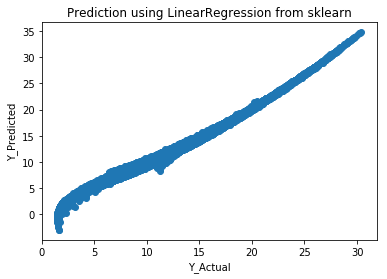

In [59]:
plt.scatter(y_test, y_pred_sklearn)
plt.xlabel('Y_Actual')
plt.ylabel('Y_Predicted')
plt.title('Prediction using LinearRegression from sklearn')

#### Part D: Gradient Descent Mini-Batch

###### 1) Similar to HW #1, you will need to add a column of 1s to X_train_scaled and X_test_scaled.

In [60]:
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

###### 2) The cost function we will use for Gradient Descent is MSE (refer to Equation 4-3 in Hands-On Machine Learning Chapter 4).

In [61]:
def cost_function(mini_batch_size, x_i, y_i, theta):
    return 2/mini_batch_size * x_i.T.dot(x_i.dot(theta) - y_i)

###### 3) Feel free to use any value for eta and epochs, but 0.1 eta and 100 epochs should work fine for this HW.

Function to execute gradient decent

In [62]:
def mini_batch_gradient_descent(mini_batch_size=None):
    m = X_train_scaled.shape[0]
    epochs = 50
    eta = 0.1
    
    np.random.seed(10)
    theta = np.random.randn(5,1)  # random initialization

    for epoch in range(epochs):

        shuffled_indices = np.random.permutation(m)
        X_shuffled = X_train_scaled[shuffled_indices]
        y_shuffled = y_train.iloc[shuffled_indices,]

        for i in range(0, m, mini_batch_size):
            x_i = X_shuffled[i:i+mini_batch_size]
            y_i = y_shuffled[i:i+mini_batch_size]
            gradients = cost_function(mini_batch_size, x_i, y_i, theta)
            theta = theta - eta * gradients
    return theta

Calculating theta using gradient descent with mini batch size as 50, 250, and 2000

In [63]:
theta_50 = mini_batch_gradient_descent(mini_batch_size=50)
theta_250 = mini_batch_gradient_descent(mini_batch_size=250)
theta_2000 = mini_batch_gradient_descent(mini_batch_size=2000)

###### 4) Calculate the following for the test data:

- mean squared error
- r-squared 
- explained variance

Function to calculate and print mean square error, r-sqaured, explained variance

In [64]:
def summary(y_actual, y_pred):
    mean_square_error = metrics.mean_squared_error(y_actual, y_pred)
    r_squared = metrics.r2_score(y_actual, y_pred)
    explained_variance = metrics.explained_variance_score(y_actual, y_pred)
    print("Mean Square Error: {0}\nr-squared: {1}\nExplained Variance: {2}".format(
        mean_square_error, r_squared, explained_variance
    ))

###### 4.1) Predicting y using theta (theta_50) from the trained model with mini_batch_size as 50

In [65]:
y_pred_50 = X_test_scaled.dot(theta_50)

In [66]:
summary(y_test, y_pred_50)

Mean Square Error: 0.11814008300590179
r-squared: 0.9933564141390695
Explained Variance: 0.9933704624097763


###### 4.2) Predicting y using theta (theta_250) from the trained model with mini_batch_size as 250

In [67]:
y_pred_250 = X_test_scaled.dot(theta_250)

In [68]:
summary(y_test, y_pred_250)

Mean Square Error: 0.111944635703496
r-squared: 0.9937048139797768
Explained Variance: 0.9937052775648687


###### 4.3) Predicting y using theta (theta_2000) from the trained model with mini_batch_size as 2000

In [69]:
y_pred_2000 = X_test_scaled.dot(theta_2000)

In [70]:
summary(y_test, y_pred_2000)

Mean Square Error: 0.10987216350786885
r-squared: 0.9938213590729046
Explained Variance: 0.9938214824391091


###### 5) Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.

Text(0.5,1,'Mini batch size = 50')

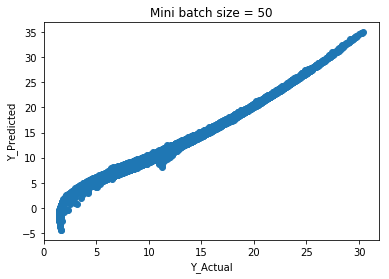

In [71]:
plt.scatter(y_test, y_pred_50)
plt.xlabel('Y_Actual')
plt.ylabel('Y_Predicted')
plt.title('Mini batch size = 50')

Text(0.5,1,'Mini batch size = 250')

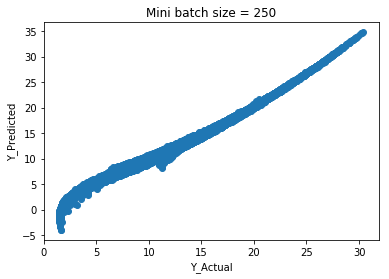

In [72]:
plt.scatter(y_test, y_pred_250)
plt.xlabel('Y_Actual')
plt.ylabel('Y_Predicted')
plt.title('Mini batch size = 250')

Text(0.5,1,'Mini batch size = 2000')

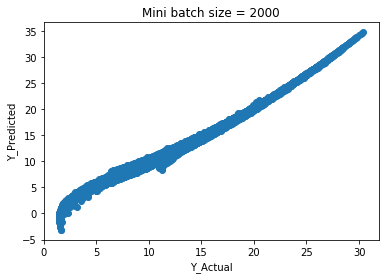

In [73]:
plt.scatter(y_test, y_pred_2000)
plt.xlabel('Y_Actual')
plt.ylabel('Y_Predicted')
plt.title('Mini batch size = 2000')

###### 6) Given we are estimating parameters through gradient descent we also want to check how our error metrics look for training data. Calculate the following for the training data:

###### 6.1) Calculating predicted y for train data with mini batch size = 50

In [74]:
y_pred_train_50 = X_train_scaled.dot(theta_50)
summary(y_train, y_pred_train_50)

Mean Square Error: 0.11981711913045097
r-squared: 0.9932922924438111
Explained Variance: 0.9933044703907522


###### 6.2) Calculating predicted y for train data with mini batch size = 250

In [75]:
y_pred_train_500 = X_train_scaled.dot(theta_250)
summary(y_train, y_pred_train_500)

Mean Square Error: 0.11340642060505762
r-squared: 0.993651181818312
Explained Variance: 0.9936513930355096


###### 6.3) Calculating predicted y for train data with mini batch size = 2000

In [76]:
y_pred_train_2000 = X_train_scaled.dot(theta_2000)
summary(y_train, y_pred_train_2000)

Mean Square Error: 0.11130460955352939
r-squared: 0.9937688472568932
Explained Variance: 0.9937691278554875
